# Statistics Simulation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy as ap

## Question 1: How often we get significant results?

Here the task is to play with linear regression where your outcome y is just random noise, unrelated to the
explanatory variables. How often do you get "statistically significant" results, i.e. results with the t-value
over 1.96, when you use one or more x-s?

You will run a large number R (1000 is a good choice) of linear regression models. In each case you
create K random x-s and a randome y, and estimate a model yi = xB + e. Just by chance, some of the
results are sometimes significant. How does it depend on the sample size N and number of features K?

### Part 1-3

#### 1. 
Pick your number of repetitions R (1000 is a good choice), number of features K (1,2,5 is a good choice), and sample sizes N. Some of these should be very small, some rather large (10, 1000, 100,000 are good choices, but you may want to adjust if the latter is too slow).

#### 2. 
For R times do:
(a) K random x-s of length N (uniform or normal, or something else like binomial)
(b) the disturbance term e of length N (normal)
(c) compute yi = x0i + ei, i.e. yi = ei and there is no relationship whatsoever with x-s.
(d) Estimate the linear regression model in the form yi = xi'B + ei.
For each component, store also whether it was statistically significant or not (i.e. whether
|t| > 1.96), and the corresponding p-value.

#### 3.
Report what is the percentage of statistically significant results: what is the percentage that a given
component was statistically significant? Than any component was statistically significant (if K > 1)?



In [43]:
## Create random data and estimate a linear regression model w/statsmodels
def lrEstimate(n,k):
    
    # empty list to store the final parameters and final  t-values
    percK = []

    for i in range(1,10001):
        
        #simulating x as a random uniform number
        #k= number of components
        #n=number of observations
        #simulating the error term (eps) as a random normal number

        x = np.random.uniform(size=(n,k)) 
        eps = np.random.normal(size=(n,1))
        y = eps
        
        #the array x is being concatenated with a new column vector of 1s because the following OLS()
        #function does not take into consideration the intercept term
        
        X = np.concatenate((np.ones_like(y), x), axis=1)
        
        #fitting a linear model
        m = sm.OLS(y, X)
        f = m.fit()
        
        params = f.params
        tValues = f.tvalues
        pValues = ap.stats.t.sf(np.abs(tValues), n-k-1)*2
        
        signifT = abs(tValues) > 1.96
        
        
        if (sum(signifT)>=1):
            percK.append(np.sum(signifT)/(k+1)*100)
            
        
    
    print("\n\n\n\t\t\t\t\t\tWhen n=",n," and k=",k,sep="")
    print("\nSignificant t-values:\n",np.asarray(percK).mean(axis=0),"%") 
    
        
    #return np.asarray(percK).mean(axis=0)


#### Part 4

Repeat the above for different N-s and different K-s. (If possible, do it for all the N-K combinations,
if not only for some.)

In [45]:
#Calculating the significant t-values for the various combinations of n and k
n = [10,100,1000,10000]
k = [2,3,4,5]

for i in n:
    for j in k:
        lrEstimate(i,j)





						When n=10 and k=2

Significant t-values:
 48.45791949817041 %



						When n=10 and k=3

Significant t-values:
 39.718162839248436 %



						When n=10 and k=4

Significant t-values:
 34.74581830108232 %



						When n=10 and k=5

Significant t-values:
 34.43483918944042 %



						When n=100 and k=2

Significant t-values:
 42.85714285714285 %



						When n=100 and k=3

Significant t-values:
 31.196711327649208 %



						When n=100 and k=4

Significant t-values:
 24.928503336510964 %



						When n=100 and k=5

Significant t-values:
 21.380148375543612 %



						When n=1000 and k=2

Significant t-values:
 42.37770193401591 %



						When n=1000 and k=3

Significant t-values:
 30.383211678832115 %



						When n=1000 and k=4

Significant t-values:
 24.283646888567294 %



						When n=1000 and k=5

Significant t-values:
 20.200970200970193 %



						When n=10000 and k=2

Significant t-values:
 40.96116233584799 %



						When n=10000 and k=3

Significant t-values:
 3

#### Part 5

What do you find: how do N and K influence false positive outcomes? Explain!

* With an increase in N, the proportion of false positive components should, theoretically, decrease
* However, with an increase in k, the model becomes complex and two or more components may be correlated amongst themselves and may cause confounding.

## Question 2: Binomial Distribution

Binomial(p, n) distribution is the distribution of sum of n independent Bernoulli events, each occuring
with probability p.

#### Part 1
Plot the probability mass function and cumulative distribution function of three binomial distributions:
(a) Binomial(0.3, 1)
(b) Binomial(0.3, 5)
(c) Binomial(0.3, 100).

You may be able to fit these distributions together but you probably want to make 6 separate plots.
The plots should look something along the lines we did in the class. You may use the canned
software, such as scipy.stats.binom.

In [531]:
#This function creates the PMF and CDF plots of the functions when n and p are given
def plotPMFCDF(n,p):
    fig, (ax1,ax2) = plt.subplots(1, 2) #making a subplot
    fig.subplots_adjust(wspace=.7) #adjusting the width space between the two subplots

    k = np.arange(0,n+1) #calculating k   

    pmf = ap.stats.binom.pmf(k=k, n=n,p=p) #pmf
    ax1.plot(k, pmf, 'bo', label='binom pmf') #plotting PMF
    ax1.vlines(k, 0, pmf, colors='b', lw=5, alpha=0.5)
    ax1.set_title("Probablity Mass Function\n when n= {} {} {}".format(n,"and p=",p))
    ax1.set_xlabel("n")
    ax1.set_ylabel("p")

    cdf = ap.stats.binom.cdf(k=k, n=n,p=p) #plotting CDF
    ax2.step(k, cdf)
    ax2.set_title("Cummulative Density Function\n when n= {} {} {}".format(n,"and p=",p))
    ax2.set_xlabel("n")
    ax2.set_ylabel("p")

    plt.show()

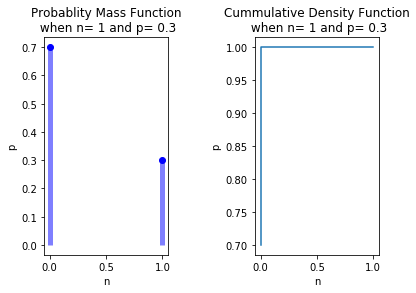

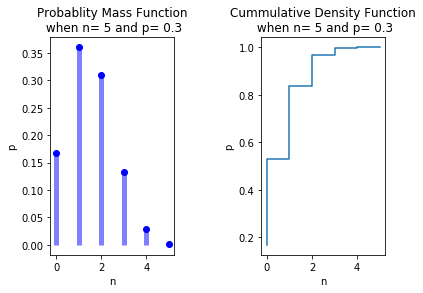

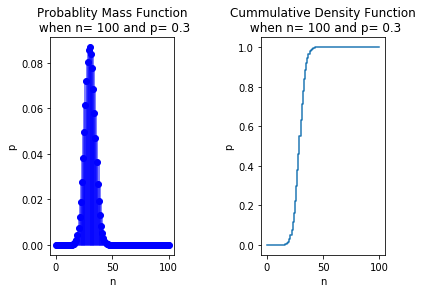

In [530]:
#part 2.1a to 2.1c
plotPMFCDF(1,0.3)
plotPMFCDF(5,0.3)
plotPMFCDF(100,0.3)

#### Part 2
Based on the last case, Binomial(0.3, 100), answer the following question: Assume the probability
that a random student on campus speaks Spanish is 0.3. What is the probability that when randomly
asking 100 students, we nd that less than 25 speak Spanish?

In [534]:
# Calculate probability that when randomly asking 100 students less than 25 speak Spanish
# Here we will get a definie number

# Theoretically to calculate the probability we will have to find the probability of exactly 0 
# students speaking spanish out of 100 students + the probability of exactly 1 student speaking spanish
# + the probability of exactly 2 students speaking spanish + .... and so on until less than 25.

# Mathematically this is given by
# summation of --> nCk * p^k * (1-p)^(n-k)
# where k takes value 0 to 24
# and nCk = n "choose" k

#This is nothing but the cummulative distributive function which is claulated using the f0llowing function

print("Probability that when randomly asking 100 students less than 25 speak Spanish is ",
      ap.stats.binom.cdf(k=25, n=100, p=0.3))

Probability that when randomly asking 100 students less than 25 speak Spanish is  0.16313010446635196


This number is exact in a sense that it is derived from an analytic expression (sum of binomial
probabilities). Now our task is to make a large number of such random samples and see if this probability
is indeed true.

#### Part 3 
Create a sample of 100 students - Bernoulli random variables with probability p = 0.3.

#### Part 4 
How many of these speak Spanish (i.e. have value 1)?

#### Part 5 
Now repeat these two steps R (1000 is a good choice) times. How often it happens that we find that
less than 25 speak Spanish?

In [538]:
lessThan25 = 0 #variable to store if the number of successes (students speaking spanish) < 25

# For loop to repeat the number of Bernoulli random variables 1000 times
for i in range(1,1001):
    
    # Passing n=1 to the Binomial distribution it is equivalent to the Bernoulli distribution
    # size = 100 tells it to ask 100 random people to find if each of them speak spanish
    x = np.random.binomial(size=100, n=1, p=0.3) 
    if sum(x) < 25: #Counting the number of 1s (people speaking spanish) in the vector returned above
        lessThan25 = lessThan25+1

print("Number of trials where less than 25 students speak spanish is",lessThan25)

Number of trials where less than 25 students speak spanish is 106


We just simulated the language skills of individual students. However, as binomial distribution is just
the sum of Bernoullis, we can instead simulate this with binomials.

#### Part 6
Repeat the same simulation using Binomial distribution.

In [539]:
# Here we are simulating a binomial distribution where the number of binomial random numbers are repeated 1000 times
# np.random.binomial() will return a vector containing the number of successes in each of the 1000 times
# We are then finding if each trial had number of successes less than 25 and eventualling counting those trials

print("Number of trials where less than 25 students speak spanish is"
      ,sum(np.random.binomial(size=1000, n=100, p=0.3)<25))

Number of trials where less than 25 students speak spanish is 130


#### Part 7
Explain your findings.

* Both Part 3-5 and Part 6 contain give similar answers, but the approach is different.
* In Part 3-5, 100 Bernoulli random variables are generated and out of these 100, the number of students speaking spanish is being counted. This process is repeated 1000 times through a loop and the the number of instances where less than 25 students were observed to speak spanish is being calcualted
* In Part 6, a binomial distributions is being made such that 100 students are being selected at random (for a total of 1000 times) and the number of instances where less than 25 students were observed to speak spanish is being calcualted
* More information is in the comments

## Question 3: German tank problem

This exercise introduces you into a statistical problem, commonly referred to as "German Tank Problem":

You are an Allied commander during WW2. After a hard fight, you capture three German
tanks. The serial numbers of the captured tanks are 12, 44 and 71. How many tanks do
Germans have assuming your men have captured tanks at random? From the intelligence you
know that Germans number the tanks sequentially.

It is not hard to solve it theoretically but here we just jump into Monte Carlo simulations. Proceed as
follows:
Obviously, Germans have at least 71 tanks. Assume, for now, that they have, say, n = 100 tanks.
(Well, they had n tanks before your boys knocked those three out...)

#### Part 1

Repeat the following R times (1000 is a good choice):

(a) Capture random tanks: choose three random integers between 1 and n without replacement.
These are the serial numbers of your captured tanks.
(b) Find the largest serial number of captured tanks. Store it in a vector.

In [597]:
# This function takes in the value of n and return the probability as per the algorithm given in the assignment
def germanTankProblem(n):
    largestSrlNum = [] #empty list to store the largest serial number

    for i in range(1000):
        #generating a vector of 3 random integers that denote the serail numbers of the tanks captured
        #here the upper limit is n+1 because the function only considers n-1 values
        capturedTanks = np.random.choice(n+1, size = 3, replace=False)
        largestSrlNum.append(capturedTanks.max()) #maximum of the captured tanks is the largets serial number

    largestSrlNum = np.asarray(largestSrlNum)#converting the list into numpy array
    
    #Calculating the probability that the largest serial number is no more than the actual value 71
    prob = len(largestSrlNum[(largestSrlNum < 71) == True])/1000 
    
    print("When n=",n, ", the probability that the largest serial number is no more than the actual value 71 is ", 
         round(prob*100,2),"%.", sep="")
    
    return prob*100


#### Part 2
Now you have a long vector of the largest serial numbers of captured tanks. Based on this list,
answer the following question: what is the probability that the largest serial number is no more than the actual value 71?

#### Part3
Now pick another possible number of tanks: n = 200. Repeat the items 1 and 2 and calculate the
probability.

#### Part 4
Pick more n-s and repeat the process. Attempt to determine the range of feasible n-s: what is a
possible number of German tanks so that the probability that the largest captured serial number of
71 is no less than 5%.

In [661]:
#When considering different values of n
n = [100,150,175,180,185,190,195,200,250]
for i in n:
    germanTankProblem(i)


When n=100, the probability that the largest serial number is no more than the actual value 71 is 32.4%.
When n=150, the probability that the largest serial number is no more than the actual value 71 is 10.1%.
When n=175, the probability that the largest serial number is no more than the actual value 71 is 6.8%.
When n=180, the probability that the largest serial number is no more than the actual value 71 is 5.8%.
When n=185, the probability that the largest serial number is no more than the actual value 71 is 6.6%.
When n=190, the probability that the largest serial number is no more than the actual value 71 is 4.8%.
When n=195, the probability that the largest serial number is no more than the actual value 71 is 3.6%.
When n=200, the probability that the largest serial number is no more than the actual value 71 is 2.8%.
When n=250, the probability that the largest serial number is no more than the actual value 71 is 1.5%.


#### Part 5
Comment/explain your findings.

* From the above, it is clear that n must be between 180 and 200, such that the probability that the largest captured serial number of 71 is no less than 5%
* The actual number cannot be obtained from these simulations because of the random numbers being generated
* However, we can conclude that n is definitely less than 200 such that the probability that the largest captured serial number of 71 is no less than 5%